# Select only the channels that have the highest variances then classfy
* this notebook will write methods for finding the variances across each channels and reduce the number of channels by selecting only the channels with the highest variances
* The goal is to be able select useful features from the data to improve our classfication scores.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mne.decoding import Vectorizer
from sklearn.preprocessing import MinMaxScaler
from mne.decoding import SPoC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
import mne
from sklearn.model_selection import StratifiedKFold
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator,
                          cross_val_multiscore, LinearModel, get_coef)
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE 
import os
from mne.decoding import UnsupervisedSpatialFilter
import os.path as op
from os import listdir
from os.path import isfile, join
from collections import defaultdict
from scipy.stats import skew, kurtosis
import mne 

from mne.decoding import Vectorizer
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC  # noqa
from sklearn.model_selection import ShuffleSplit  # noqa

from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis
from sklearn.metrics import confusion_matrix
from mne.viz import tight_layout

import time
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


In [4]:
%run Batch_ArtifactFilter_Epoch.ipynb

In [9]:
epoch=remove_artifacts_and_create_epochs('C:\\USB Drive\\NewEEG-200s\\SA20140206\\20140206_1151.set')

hello
Reading C:\USB Drive\NewEEG-200s\SA20140206\20140206_1151.fdt
Reading 0 ... 831247  =      0.000 ...  1623.529 secs...
5977 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
time difference 1.80859375
[509034      0      4]
[509960      0    130]

 **1 bad trials dropped**
Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from 5 - 1e+02 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 25.0 Hz
Filter length of 845 samples (1.650 sec) selected
5977 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]


[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   29.7s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   43.7s finished


5584 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 111.0s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
1979 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1979 events and 500 original time points ...
1011 bad epochs dropped


In [10]:
def removebadchannel(epoch):
    epoch.drop_channels(['Lm','Rm','VEOG'])
    epoch.drop_channels(['STI 014'])

In [ ]:
## Find Channels that are below or above standard deviation
def findchanel (newdata, i,j):
    dataof50=[]
    k=0
    index=[]
    arrayofdata=[]
    sum1=[]
    sum2=[]
    for channel in newdata[j:j+10]:
        dataof50.append(channel)

    arrayofdata50=np.array(dataof50)
   # print(arrayofdata50.shape)
    for channel in arrayofdata50:
        sum1.append(np.sum(channel))
    sum1=np.array(sum1)
    #print("shape of channel sum : Xi", sum1.shape , sum1[0:3])
    mean1=np.sum(sum1)/125
    #print("mean of 125 channel: X",mean1)
    Dev=sum1-mean1
    #print("Xi-X",Dev.shape,Dev[0:3])
    SquareofDev=Dev*Dev
    #print("(Xi-X)^2",SquareofDev.shape,SquareofDev[0:3])
        ##print("variance",var1)
    sumofdev=np.sum(SquareofDev)
    #print("sum of (Xi-X)^2",sumofdev)
    var=sumofdev/125
    #print("variance",var)
    std=np.sqrt(var)
    #print("std",std)
    dis1=mean1-std
    dis2=mean1+std
    print(dis1,dis2)
    #print(arrayofdat3.shape)
    for k in range(len(sum1)):
        if sum1[k]<dis1 or sum1[k]>dis2 :
            sum2.append(sum1[k])
            index.append(k)
            arrayofdata.append(arrayofdata50[i])
            #print(arrayofdat3.shape)
    sum2=np.array(sum2)
    arrayofdata=np.array(arrayofdata)
    #print(sum2.shape)
    #print(index)
    print(arrayofdata.shape)
#     stdup=[dis1]*125
#     stddown=[dis2]*125
#     x=np.arange(0,125,1)
#     _=plt.plot(x,sum1)
#     _=plt.plot(x,stdup)
#     _=plt.plot(x,stddown)

In [ ]:
findchanel (newdata, 0,1)

In [11]:
 removebadchannel(epoch)

In [12]:
newdata=epoch.get_data()
epoch.get_data().shape

(968, 125, 500)

In [26]:
y = epoch.events[:,-1]
preds = np.empty(len(y))
y

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [29]:
dataXX = epoch.get_data()
eventsYY = epoch.events[:,-1]

clf = make_pipeline(Vectorizer(),
                    MinMaxScaler(),
                    KNN(n_neighbors=13))

#cross validation
cv = StratifiedKFold(n_splits = 10, shuffle=True)
preds = np.empty(len(eventsYY))
scoresss = []
for train,test in cv.split(dataXX,eventsYY):
    clf.fit(dataXX[train],eventsYY[train])
    preds[test] = clf.predict(dataXX[test])
    scoresss.append(clf.score(dataXX[test],eventsYY[test]))

In [30]:

print("mean classification score", np.mean(scoresss))

mean classification score 0.5362683217616944


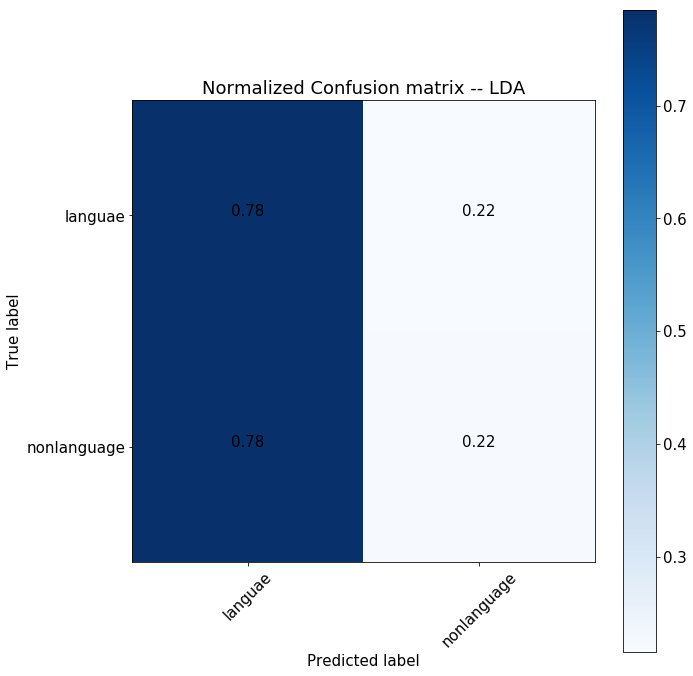

In [33]:

target_names = [ 'languae', 'nonlanguage']
# Normalized confusion matrix
from sklearn.metrics import confusion_matrix
from mne.viz import tight_layout
import itertools


cm = confusion_matrix(eventsYY,preds)
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion matrix -- LDA')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)

fmt = '.2f'
for i, j in itertools.product(range(cm_normalized.shape[0]), range(cm_normalized.shape[1])):
        plt.text(j, i, format(cm_normalized[i, j],fmt),
                 horizontalalignment="center",
                 color="black")
tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
findchanel (newdata, 0,1)

In [ ]:
def findchanel (newdata):
    arrays=[]
    for epochs in newdata:
        dataof50=[]
        sum1=[]
        sum2=[]
        index=[]
        k=0
        for channel in epochs:
            dataof50.append(channel)
        arrayofdata50=np.array(dataof50)
        for channel in arrayofdata50:
            sum1.append(np.sum(channel))
        arraysum1=np.array(sum1)
        mean1=np.sum(arraysum1)/125
        std=np.std(arraysum1)
        dis1=mean1-std
        dis2=mean1+std
        j=0
        channel1=[]
        for k in range(len(arraysum1)):
            if (arraysum1[k]<dis1 or arraysum1[k]>dis2) and j<30:
                j=j+1
                sum2.append(arraysum1[k])
                index.append(k)
                x=k
                channel1.append(arrayofdata50[k])
        while (j<30):
            channel1.append(arrayofdata50[x])
            j=j+1
        arrays.append(channel1)
        arrayofdata=np.array(arrays)
        print(arrayofdata.shape)
    return arrayofdata

In [ ]:
arrayofdata=[]

In [ ]:
arrayofdata=findchanel(newdata)

In [ ]:
dataof50=[]
for channel in newdata[1]:
    dataof50.append(channel)
arrayofdata50=np.array(dataof50)
print(arrayofdata50.shape)
sum1=[]
for channel in arrayofdata50:
    sum1.append(np.sum(channel))
arraysum1=np.array(sum1)
std1=np.std(arraysum1)
print(std1)
mean1=np.sum(arraysum1)/125
Dev=arraysum1-mean1
SquareofDev=Dev*Dev
sumofdev=np.sum(SquareofDev)
var=sumofdev/125
        #print("variance",var)
std=np.sqrt(var)
print("std",std)

In [ ]:
def classify_test_KNN(X,y):

    clf = make_pipeline(Vectorizer(),
                        StandardScaler(),
                        KNN(n_neighbors=13))
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
    
    clf.fit(X_train, y_train)
    
    score = clf.score(X_test, y_test)
    
    return score


In [ ]:
def get_samples_targets(epochs):
    X = epochs.get_data()
    y = epochs.events[:,-1]
    return X, y

In [ ]:
len(epoch.events[:,-1])

In [ ]:
print(arrayofdata.shape)
X = arrayofdata
y = epoch.events[:,-1]
classify_test_KNN(X,y)

In [20]:
## Methods for convert our events into binary, 4: Language, 5:Non Language
def filter_event_id(epoch):
    epochs=[[]]
    j=0
    for i in range(len(epoch.events[:,-1])):
        if i % 3 ==0:
            epochs.append([])
            j=j+1
            epochs[j].append(epoch.events[i,-1])
        else:
            epochs[j].append(epoch.events[i,-1])
    for events in epochs:
        if  4 in events or 1 in events or 13 in events or 16 in events:
            for i in range(len(events)):
                    events[i]=4
        else:
            for i in range(len(events)):
                    events[i]=5
    epochs.pop(0)
    flattened_list = [y for x in epochs for y in x]
    for i in range(len(epoch.events)):
        epoch.events[i]=flattened_list[i]
    return epoch

In [ ]:
epoch=filter_event_id(epoch)
epoch.events[:,-1]
y

In [ ]:
print(arrayofdata.shape)
X = arrayofdata
y = epoch.events[:,-1]
classify_test_KNN(X,y)

In [ ]:
print(newdata.shape)
X = newdata
y = epoch.events[:,-1]
classify_test_KNN(X,y)

In [ ]:
print(y)

In [ ]:
x=[0.6460481099656358,0.5567010309278351],[0.6912280701754386,0.624561403508772]

In [ ]:
y

In [ ]:
classify_test_KNN(X,y)

In [ ]:
epoch=remove_artifacts_and_create_epochs('C:\\USB Drive\\NewEEG-200s\\SA20140206\\20140206_1029.set')

In [ ]:
 removebadchannel(epoch)

In [ ]:
newdata=epoch.get_data()
epoch.get_data().shape

In [ ]:
arrayofdata=findchanel(newdata)

In [ ]:
print(arrayofdata.shape)
X = arrayofdata
y = epoch.events[:,-1]
classify_test_KNN(X,y)
## classfication on the selected channels

In [ ]:
epoch=filter_event_id(epoch)
epoch.events[:,-1]

In [113]:
print(reducedata.shape)
X = reducedata
y = epoch.events[:,-1]
classify_test_KNN(X,y)

(949, 30, 500)


0.6912280701754386

In [118]:
print(data.shape)
X = data
y = epoch.events[:,-1]
classify_test_KNN(X,y)

(949, 125, 500)


0.624561403508772

In [127]:
epoch=remove_artifacts_and_create_epochs('C:\\USB Drive\\NewEEG-200s\\SA20140207\\20140207_1219.set')

hello
Reading C:\USB Drive\NewEEG-200s\SA20140207\20140207_1219.fdt
Reading 0 ... 1011619  =      0.000 ...  1975.818 secs...
5975 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
time difference 2.517578125
[8844    0   19]
[10133     0   130]
time difference 5.384765625
[12031     0    19]
[14788     0   130]
time difference 2.5703125
[17827     0    19]
[19143     0   130]
time difference 2.64453125
[217928      0     10]
[219282      0    130]
time difference 1.078125
[461464      0     22]
[462016      0    130]
time difference 1.46484375
[567871      0      7]
[568621      0    130]
time difference 1.89453125
[711460      0      1]
[712430      0    130]

 **7 bad trials dropped**
Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from 5

[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   50.4s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:  1.1min finished


5575 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128


C:\Users\new user\New folder\envs\py36\lib\site-packages\sklearn\decomposition\fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


Fitting ICA took 709.5s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
1960 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1960 events and 500 original time points ...
1020 bad epochs dropped


In [128]:
 removebadchannel(epoch)

In [129]:
newdata=epoch.get_data()
epoch.get_data().shape

(940, 125, 500)

In [130]:
arrayofdata=findchanel(newdata)

(1, 30, 500)
(2, 30, 500)
(3, 30, 500)
(4, 30, 500)
(5, 30, 500)
(6, 30, 500)
(7, 30, 500)
(8, 30, 500)
(9, 30, 500)
(10, 30, 500)
(11, 30, 500)
(12, 30, 500)
(13, 30, 500)
(14, 30, 500)
(15, 30, 500)
(16, 30, 500)
(17, 30, 500)
(18, 30, 500)
(19, 30, 500)
(20, 30, 500)
(21, 30, 500)
(22, 30, 500)
(23, 30, 500)
(24, 30, 500)
(25, 30, 500)
(26, 30, 500)
(27, 30, 500)
(28, 30, 500)
(29, 30, 500)
(30, 30, 500)
(31, 30, 500)
(32, 30, 500)
(33, 30, 500)
(34, 30, 500)
(35, 30, 500)
(36, 30, 500)
(37, 30, 500)
(38, 30, 500)
(39, 30, 500)
(40, 30, 500)
(41, 30, 500)
(42, 30, 500)
(43, 30, 500)
(44, 30, 500)
(45, 30, 500)
(46, 30, 500)
(47, 30, 500)
(48, 30, 500)
(49, 30, 500)
(50, 30, 500)
(51, 30, 500)
(52, 30, 500)
(53, 30, 500)
(54, 30, 500)
(55, 30, 500)
(56, 30, 500)
(57, 30, 500)
(58, 30, 500)
(59, 30, 500)
(60, 30, 500)
(61, 30, 500)
(62, 30, 500)
(63, 30, 500)
(64, 30, 500)
(65, 30, 500)
(66, 30, 500)
(67, 30, 500)
(68, 30, 500)
(69, 30, 500)
(70, 30, 500)
(71, 30, 500)
(72, 30, 500)
(

(558, 30, 500)
(559, 30, 500)
(560, 30, 500)
(561, 30, 500)
(562, 30, 500)
(563, 30, 500)
(564, 30, 500)
(565, 30, 500)
(566, 30, 500)
(567, 30, 500)
(568, 30, 500)
(569, 30, 500)
(570, 30, 500)
(571, 30, 500)
(572, 30, 500)
(573, 30, 500)
(574, 30, 500)
(575, 30, 500)
(576, 30, 500)
(577, 30, 500)
(578, 30, 500)
(579, 30, 500)
(580, 30, 500)
(581, 30, 500)
(582, 30, 500)
(583, 30, 500)
(584, 30, 500)
(585, 30, 500)
(586, 30, 500)
(587, 30, 500)
(588, 30, 500)
(589, 30, 500)
(590, 30, 500)
(591, 30, 500)
(592, 30, 500)
(593, 30, 500)
(594, 30, 500)
(595, 30, 500)
(596, 30, 500)
(597, 30, 500)
(598, 30, 500)
(599, 30, 500)
(600, 30, 500)
(601, 30, 500)
(602, 30, 500)
(603, 30, 500)
(604, 30, 500)
(605, 30, 500)
(606, 30, 500)
(607, 30, 500)
(608, 30, 500)
(609, 30, 500)
(610, 30, 500)
(611, 30, 500)
(612, 30, 500)
(613, 30, 500)
(614, 30, 500)
(615, 30, 500)
(616, 30, 500)
(617, 30, 500)
(618, 30, 500)
(619, 30, 500)
(620, 30, 500)
(621, 30, 500)
(622, 30, 500)
(623, 30, 500)
(624, 30, 

In [123]:
print(arrayofdata.shape)
X = arrayofdata
y = epoch.events[:,-1]
classify_test_KNN(X,y)

(922, 30, 500)


0.07942238267148015

In [136]:
epoch=filter_event_id(epoch)
epoch.events[:,-1]

array([4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [138]:
print(arrayofdata.shape)
X = arrayofdata
y = epoch.events[:,-1]
classify_test_KNN(X,y)

(940, 30, 500)


0.5531914893617021

In [133]:
print(newdata.shape)
X = newdata
y = epoch.events[:,-1]
classify_test_KNN(X,y)

(940, 125, 500)


0.5354609929078015

In [137]:
x=[0.6460481099656358,0.5567010309278351],[0.6912280701754386,0.624561403508772],[0.5531914893617021,0.5354609929078015]

In [140]:
def findchanel1 (newdata):
    dataof50=[]
    for channel in newdata[0]:
        dataof50.append(channel)

    arrayofdata50=np.array(dataof50)
    print(arrayofdata50.shape)
    sum1=[]
    sum2=[]
    for channel in arrayofdata50:
        sum1.append(np.sum(channel))
    sum1=np.array(sum1)
    #print("shape of channel sum : Xi", sum1.shape , sum1[0:3])
    mean1=np.sum(sum1)/125
    #print("mean of 125 channel: X",mean1)
    Dev=sum1-mean1
    #print("Xi-X",Dev.shape,Dev[0:3])
    SquareofDev=Dev*Dev
    #print("(Xi-X)^2",SquareofDev.shape,SquareofDev[0:3])
        ##print("variance",var1)
    sumofdev=np.sum(SquareofDev)
    #print("sum of (Xi-X)^2",sumofdev)
    var=sumofdev/125
    #print("variance",var)
    std=np.sqrt(var)
    #print("std",std)
    dis1=mean1-std
    dis2=mean1+std
    print(dis1,dis2)
    k=0
    index=[]
    for k in range(len(sum1)):
        if sum1[k]<dis1 or sum1[k]>dis2 :
            sum2.append(sum1[k])
            index.append([k])
    sum2=np.array(sum2)
    print(sum2.shape)
    print(index)
    stdup=[dis1]*125
    stddown=[dis2]*125
    x=np.arange(0,125,1)
    _=plt.plot(x,sum1)
    _=plt.plot(x,stdup)
    _=plt.plot(x,stddown)

In [141]:
findchanel1 (newdata)

(125, 500)
-0.002391701030918735 0.0023459362532116702
(33,)
[[1], [9], [17], [19], [24], [28], [33], [34], [37], [49], [54], [56], [58], [60], [61], [64], [68], [69], [73], [77], [78], [79], [82], [86], [87], [97], [101], [102], [105], [107], [108], [110], [121]]


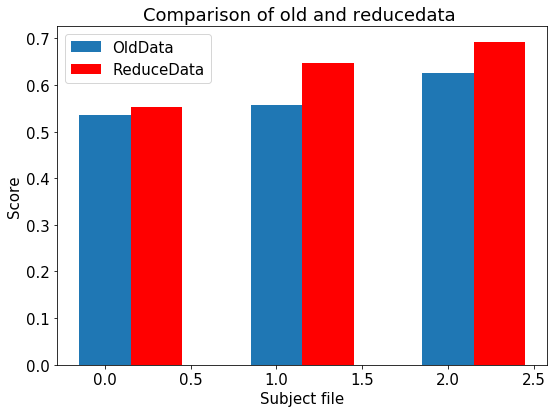

In [7]:
## Bar graph comparing Reduced data and New data
index=np.arange(3)
w=0.3
fig, ax = plt.subplots(figsize = (8,6))
rects1=ax.bar(index,y,w)
rects2=ax.bar(index+w,x,w,color="red")
ax.set_title('Comparison of old and reducedata ')
ax.set_xlabel('Subject file')
ax.set_ylabel('Score')
ax.legend( (rects1[0], rects2[0]), ('OldData', 'ReduceData') )
fig.tight_layout()